In [24]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('/Users/apple/Downloads/Sardar Vallabhbhai National Institute of Technology,Surat/MACHINE L/start of ml/Social_Network_Ads.csv')
df = df.iloc[:,2:]

In [26]:
df.sample(5)

,Age,EstimatedSalary,Purchased
355,60,34000,1
152,31,76000,0
206,55,130000,1
202,39,134000,1
300,58,38000,1


# Train test split

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df.drop(columns="Purchased"),df["Purchased"],test_size=0.3,random_state=0)

In [28]:
X_train.shape,X_test.shape

((280, 2), (120, 2))

# standard scaler 

In [29]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

# fit the scaler to the train Set , it learn the parameter like mean or std 
scaler.fit(X_train)

# transform the datasets (train and the test )
X_trained_scaled = scaler.transform(X_train) # standardisation ka formula yaha pe apply hoga
X_test_scaled = scaler.transform(X_test)

In [30]:
scaler.scale_

array([1.01999375e+01, 3.45792870e+04])

# convert to the dataframe

In [31]:
X_trained_scaled=pd.DataFrame(X_trained_scaled ,columns=X_train.columns).reset_index()
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns).reset_index()

In [32]:
X_trained_scaled= X_trained_scaled.drop(columns="index")


In [33]:
X_trained_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [34]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


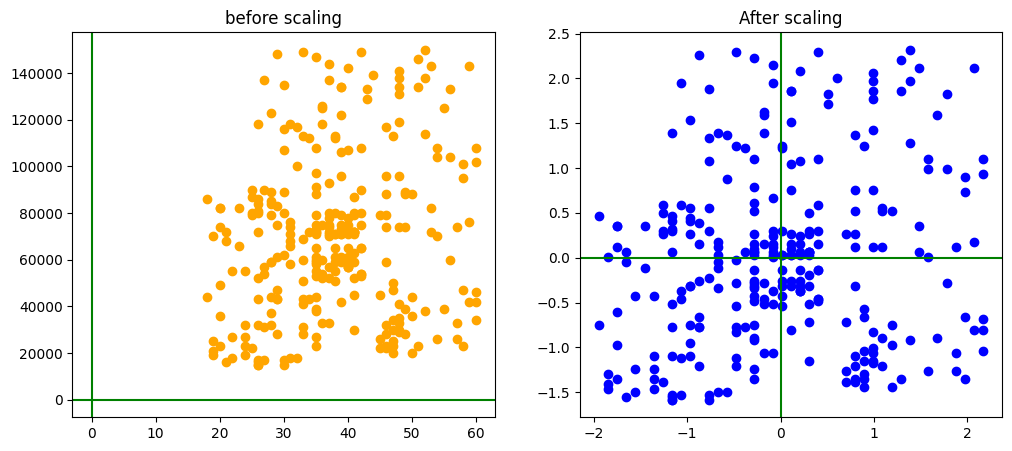

In [35]:
fig ,(ax1 ,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train["Age"],X_train["EstimatedSalary"],color="orange")
ax1.set_title("before scaling")
ax1.axhline(0,color="green")
ax1.axvline(0,color="green")
ax2.scatter(X_trained_scaled["Age"],X_trained_scaled["EstimatedSalary"],color="blue")
ax2.axhline(0,color="green")
ax2.axvline(0,color="green")
ax2.set_title("After scaling")
plt.show()

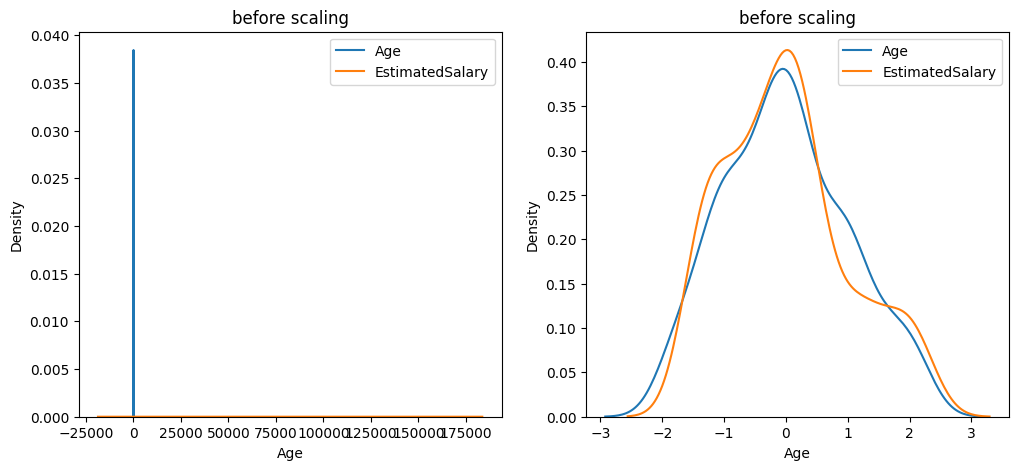

In [36]:
fig ,(ax1 ,ax2) = plt.subplots(ncols=2,figsize=(12,5))
#before scaling 
ax1.set_title("before scaling")
sns.kdeplot(data=X_train,x="Age",ax=ax1,label="Age")
sns.kdeplot(data=X_train,x="EstimatedSalary",ax=ax1,label="EstimatedSalary")
ax1.legend()
#AFTER SCALING
ax2.set_title("before scaling")
sns.kdeplot(data=X_trained_scaled,x="Age",ax=ax2,label="Age")
sns.kdeplot(data=X_trained_scaled,x="EstimatedSalary",ax=ax2,label="EstimatedSalary")
plt.legend()
plt.show()

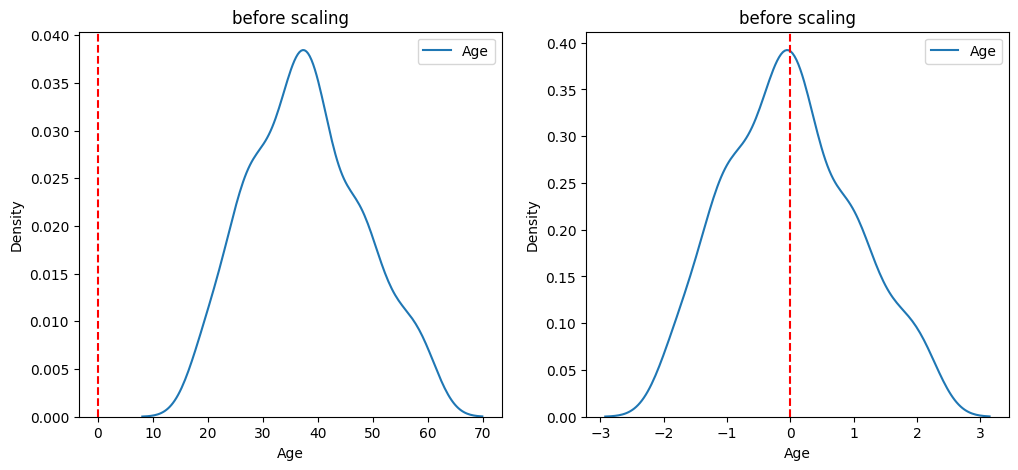

In [37]:
fig ,(ax1 ,ax2) = plt.subplots(ncols=2,figsize=(12,5))
#before scaling 
ax1.set_title("before scaling")
sns.kdeplot(data=X_train,x="Age",ax=ax1,label="Age")
ax1.axvline(0,color="red",linestyle="--")
ax1.legend()

#AFTER SCALING
ax2.set_title("before scaling")
sns.kdeplot(data=X_trained_scaled,x="Age",ax=ax2,label="Age")
ax2.axvline(0,color="red",linestyle="--")
plt.legend()
plt.show()

# why scaling is importnat

In [38]:
from sklearn.linear_model import  LogisticRegression

In [39]:
a = LogisticRegression()
a_scaled = LogisticRegression()

In [40]:
X_test_scaled=X_test_scaled.drop(columns="index")

In [41]:
a.fit(X_train,Y_train)
a_scaled.fit(X_trained_scaled,Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [42]:
Y_pred = a.predict(X_test)

Y_scaled_pred = a_scaled.predict(X_test_scaled)

In [43]:
from sklearn.metrics import accuracy_score
print("Accuracy Actual : ",accuracy_score(Y_test,Y_pred))
print("Accuracy scale : ",accuracy_score(Y_test,Y_scaled_pred))

Accuracy Actual :  0.875
Accuracy scale :  0.8666666666666667


In [45]:


# . Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print("before scale Accuracy:", a.score(X_test_scaled, Y_test))
print("Accuracy after scale :", a_scaled.score(X_test_scaled, Y_test))
print(classification_report(y_test, y_pred))



before scale Accuracy: 0.6583333333333333
Accuracy after scale : 0.8666666666666667


NameError: name 'y_test' is not defined